In [1]:
!pip install ultralytics
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 15.9 MB/s eta 0:00:00
Sat Feb 22 16:34:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                

In [2]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


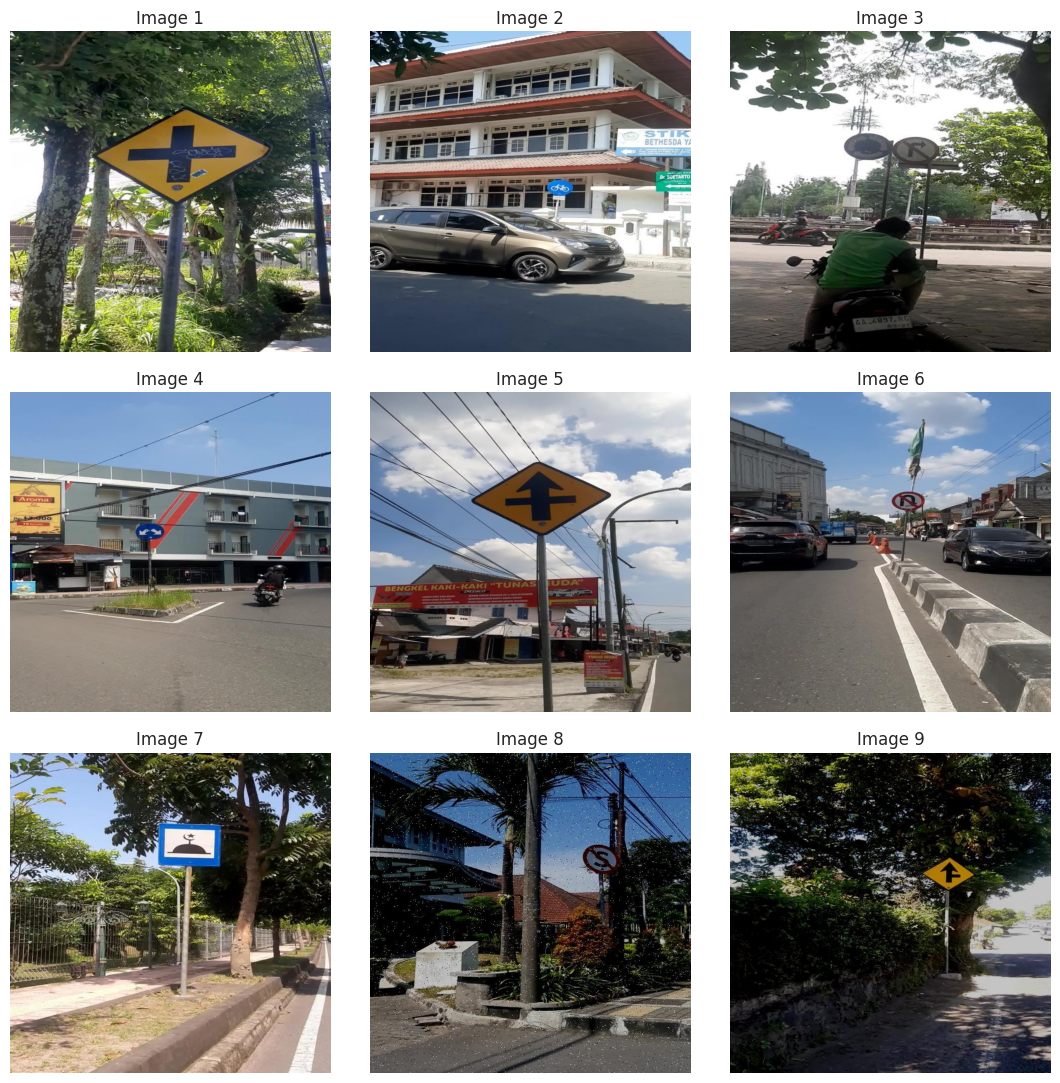

In [3]:
Image_dir = '/kaggle/input/indonesia-traffic-sign-dataset-yolov11/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Use a pretrained YOLOv11n model
model = YOLO("yolo11n.pt")

# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.yaml').load('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/indonesia-traffic-sign-dataset-yolov11/data.yaml",
                                       epochs=300, imgsz = 480, batch = 128,scale=0.5,
                                       mosaic=1.0,lr0=0.0001,dropout= 0.20, device = 0)

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.8MB/s]


Transferred 499/499 items from pretrained weights
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=/kaggle/input/indonesia-traffic-sign-dataset-yolov11/data.yaml, epochs=300, time=None, patience=100, batch=128, imgsz=480, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=40

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/input/indonesia-traffic-sign-dataset-yolov11/train/labels... 10714 images, 735 backgrounds, 0 corrupt: 100%|██████████| 10714/10714 [01:01<00:00, 174.57it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/indonesia-traffic-sign-dataset-yolov11/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/indonesia-traffic-sign-dataset-yolov11/valid/labels... 3085 images, 209 backgrounds, 0 corrupt: 100%|██████████| 3085/3085 [00:16<00:00, 182.87it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/indonesia-traffic-sign-dataset-yolov11/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      10.3G     0.7986      4.364      1.088        145        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.34s/it]


                   all       3085       2994     0.0815      0.661      0.157       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      10.3G     0.7571      2.547      1.057        151        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994       0.59       0.62      0.639      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      10.2G     0.7695      1.844      1.052        144        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


                   all       3085       2994      0.484      0.527      0.518      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      10.2G     0.8019      1.669      1.066        143        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.593      0.604      0.612      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      10.2G     0.7595      1.439       1.05        131        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.31s/it]


                   all       3085       2994      0.666      0.664      0.695      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      10.2G     0.7176      1.249      1.032        159        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.791       0.79      0.835      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      10.2G      0.703      1.133      1.032        148        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.817      0.778      0.856      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      10.3G     0.6719      1.008      1.016        150        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.794      0.819      0.848       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      10.2G     0.6666     0.9335      1.011        165        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.859      0.792      0.866      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      10.2G     0.6422     0.8564      0.997        150        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.798      0.818      0.869      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      10.2G     0.6315     0.8157     0.9949        138        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.855      0.841      0.914      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      10.2G     0.6239     0.7797     0.9899        153        480: 100%|██████████| 84/84 [01:09<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.721       0.63      0.692      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      10.2G     0.6159     0.7356     0.9909        156        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

                   all       3085       2994      0.824      0.876      0.919      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      10.2G     0.5986     0.7124     0.9793        148        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.872      0.857      0.919      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      10.2G     0.6011     0.6986     0.9816        166        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.855      0.923      0.936      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      10.2G     0.5859     0.6733     0.9767        148        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.895       0.95      0.954      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      10.2G     0.5865     0.6551     0.9733        162        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.872      0.903      0.936       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      10.3G     0.5748     0.6377     0.9704        148        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.917      0.925      0.948      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      10.2G     0.5733     0.6333     0.9676        127        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

                   all       3085       2994      0.877      0.914      0.942       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.2G     0.5644     0.6108     0.9654        148        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.882      0.918      0.944      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      10.2G     0.5609     0.6066     0.9653        150        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.907      0.946       0.95      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      10.2G     0.5555     0.5958     0.9613        158        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.917      0.947      0.953      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      10.3G     0.5553     0.5917     0.9587        162        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]


                   all       3085       2994      0.912      0.939      0.945      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      10.2G     0.5418     0.5712     0.9543        147        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.904      0.944      0.958      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      10.2G     0.5453     0.5748     0.9574        145        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.33s/it]

                   all       3085       2994      0.915      0.953      0.957       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      10.2G     0.5435      0.569       0.96        151        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.933      0.965      0.961      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      10.2G     0.5443     0.5688     0.9591        166        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.903      0.947      0.952      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      10.2G     0.5378     0.5562     0.9563        148        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.33s/it]


                   all       3085       2994      0.914      0.971      0.959      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      10.2G     0.5343     0.5586     0.9554        172        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.925      0.965      0.961      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      10.2G     0.5369     0.5447     0.9545        153        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.925      0.965      0.961      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      10.2G     0.5255     0.5366     0.9494        143        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.917      0.957      0.961      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      10.2G     0.5252     0.5347     0.9457        142        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.935      0.969      0.964      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      10.2G     0.5228     0.5199     0.9447        151        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

                   all       3085       2994      0.936      0.972      0.967      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      10.2G      0.523     0.5169     0.9468        141        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.926      0.956      0.958      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      10.2G     0.5157     0.5208     0.9416        144        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.922      0.965       0.96      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      10.2G     0.5187     0.5109     0.9483        173        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.939      0.965      0.959      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      10.2G     0.5166     0.5164     0.9496        136        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]


                   all       3085       2994       0.94       0.98      0.966      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      10.2G     0.5129     0.5103     0.9419        131        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.941      0.967      0.966      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      10.3G     0.5096     0.5108     0.9427        160        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.935      0.973       0.96      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      10.2G     0.5096     0.5094      0.942        165        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.941      0.976      0.966        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      10.2G     0.5055     0.5036       0.94        133        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.937      0.986      0.965      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      10.2G      0.505     0.4936     0.9407        144        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]


                   all       3085       2994      0.945      0.978      0.965        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      10.2G     0.4998     0.4932     0.9395        140        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.941       0.98      0.966      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      10.2G     0.5003     0.4946     0.9421        144        480: 100%|██████████| 84/84 [01:09<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.939      0.984      0.966      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      10.2G     0.4961     0.4865     0.9399        139        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.928      0.979      0.964        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      10.2G     0.4984     0.4838     0.9403        159        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.949      0.978      0.966      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      10.2G     0.4959     0.4847     0.9373        150        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.949      0.979       0.97      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      10.2G     0.4957     0.4766     0.9365        155        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.937      0.979      0.968      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      10.2G     0.4945     0.4769     0.9374        165        480: 100%|██████████| 84/84 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


                   all       3085       2994      0.942      0.979      0.967      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      10.2G     0.4966     0.4767     0.9383        136        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.949      0.985      0.968      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      10.3G      0.498      0.485     0.9382        135        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.938      0.979      0.968        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      10.2G     0.4883     0.4706     0.9347        149        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.945      0.987      0.967      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      10.2G     0.4886     0.4665     0.9315        153        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.936      0.986      0.969      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      10.2G      0.492     0.4651     0.9344        156        480: 100%|██████████| 84/84 [01:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.943      0.984      0.968       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      10.2G     0.4814     0.4644     0.9285        164        480: 100%|██████████| 84/84 [01:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.945      0.988      0.969       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      10.3G     0.4864      0.463     0.9344        154        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.951      0.983      0.968      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      10.2G     0.4871     0.4693     0.9373        139        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]


                   all       3085       2994      0.946      0.988       0.97      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      10.2G     0.4823     0.4555     0.9307        180        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.949       0.99      0.972      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      10.2G     0.4837     0.4564     0.9331        161        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]


                   all       3085       2994      0.945      0.991      0.969      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      10.2G     0.4866     0.4593     0.9367        156        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994       0.95      0.989      0.969      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      10.3G     0.4761     0.4536     0.9299        147        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.943      0.981      0.969      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      10.2G     0.4804     0.4584     0.9317        147        480: 100%|██████████| 84/84 [01:09<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.945      0.986      0.969      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      10.2G     0.4761     0.4461     0.9271        158        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


                   all       3085       2994      0.945      0.987      0.969      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      10.2G     0.4779     0.4523      0.931        168        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.945       0.99       0.97      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      10.2G     0.4803     0.4522     0.9313        151        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.15s/it]

                   all       3085       2994      0.943      0.988      0.968      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      10.2G     0.4786     0.4429      0.931        139        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]


                   all       3085       2994      0.943       0.99      0.966      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      10.3G     0.4701     0.4406     0.9248        138        480: 100%|██████████| 84/84 [01:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all       3085       2994      0.949      0.989      0.969      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      10.3G     0.4739     0.4372     0.9278        142        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.946       0.99      0.968      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      10.2G     0.4692     0.4375     0.9245        159        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]


                   all       3085       2994      0.946      0.988      0.968      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      10.2G     0.4697     0.4353     0.9258        158        480: 100%|██████████| 84/84 [01:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]


                   all       3085       2994      0.948      0.987      0.968      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      10.2G     0.4679     0.4374     0.9264        166        480: 100%|██████████| 84/84 [01:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]


                   all       3085       2994      0.949       0.99      0.969      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      10.2G      0.468     0.4318      0.927        152        480: 100%|██████████| 84/84 [01:06<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.952      0.994       0.97      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      10.2G      0.469     0.4363     0.9246        162        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.946      0.992      0.968       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      10.2G     0.4628     0.4325     0.9262        140        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.955      0.992      0.969      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      10.2G     0.4627     0.4278     0.9233        134        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.955      0.993       0.97       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      10.2G     0.4692     0.4302     0.9253        160        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.954      0.992       0.97      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      10.2G     0.4649     0.4277     0.9261        145        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]


                   all       3085       2994      0.951      0.992      0.969       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      10.2G     0.4625     0.4259     0.9238        144        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.945      0.989      0.968       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      10.2G     0.4574      0.426     0.9213        149        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.954      0.993       0.97      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      10.2G     0.4613     0.4268     0.9262        160        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.954      0.991       0.97       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      10.2G     0.4562     0.4183     0.9219        151        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.954      0.994      0.969       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      10.2G     0.4586     0.4282     0.9257        164        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.952      0.991      0.968      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      10.3G     0.4593      0.417     0.9226        154        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.952      0.993      0.968       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      10.2G     0.4569     0.4187     0.9229        153        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.31s/it]


                   all       3085       2994      0.953      0.993      0.972      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      10.2G     0.4523      0.415     0.9191        148        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.953      0.995       0.97      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      10.3G     0.4531     0.4196     0.9212        146        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.955      0.995      0.971      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      10.2G     0.4565     0.4137     0.9199        147        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.952      0.995       0.97      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      10.2G     0.4568     0.4163     0.9208        165        480: 100%|██████████| 84/84 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.955      0.993       0.97      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      10.2G     0.4565     0.4141     0.9209        152        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.31s/it]


                   all       3085       2994      0.955      0.994      0.969      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      10.2G     0.4517     0.4145     0.9195        148        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]


                   all       3085       2994      0.952      0.994       0.97      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      10.3G     0.4498     0.4087     0.9189        142        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.954      0.993       0.97      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      10.2G     0.4527     0.4049     0.9226        148        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.954      0.994      0.971      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      10.2G     0.4513     0.4032      0.919        152        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.954      0.994       0.97      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      10.2G     0.4477     0.4076     0.9173        164        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.953      0.994       0.97      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      10.2G     0.4477     0.4047     0.9195        152        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.953      0.994       0.97      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      10.2G     0.4454     0.3996     0.9135        177        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.951      0.993       0.97      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      10.2G     0.4466     0.3988     0.9197        164        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


                   all       3085       2994      0.954      0.994       0.97      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      10.2G     0.4452     0.4026     0.9179        125        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.953      0.994       0.97      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      10.2G     0.4436      0.401     0.9167        125        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.954      0.994      0.971       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      10.2G     0.4448     0.4016     0.9155        164        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.952      0.994      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      10.2G      0.449      0.403     0.9176        155        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.956      0.995      0.971      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      10.2G     0.4476     0.3977     0.9188        166        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.956      0.995      0.971      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      10.2G     0.4451     0.3937     0.9181        138        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.954      0.996       0.97      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      10.2G     0.4478     0.3972     0.9203        155        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all       3085       2994      0.954      0.996      0.969      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      10.2G     0.4456     0.4011     0.9174        160        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.954      0.995      0.971       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      10.2G     0.4371     0.3943     0.9155        149        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


                   all       3085       2994      0.954      0.995      0.969      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      10.2G     0.4374     0.3936     0.9144        152        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.952      0.996      0.971      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      10.2G     0.4408     0.3997     0.9147        118        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.953      0.996      0.971      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      10.3G     0.4353     0.3891     0.9151        157        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]

                   all       3085       2994      0.954      0.996      0.972      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      10.2G     0.4404      0.391     0.9148        174        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.953      0.996      0.972      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      10.2G     0.4386     0.3859      0.913        143        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all       3085       2994      0.954      0.995      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      10.2G     0.4366     0.3817     0.9109        144        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.954      0.996      0.972      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      10.2G      0.435     0.3834      0.913        143        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.953      0.997      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      10.2G      0.438     0.3886     0.9136        155        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.954      0.997       0.97       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      10.2G     0.4368     0.3898     0.9126        167        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

                   all       3085       2994      0.955      0.996      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      10.2G     0.4368     0.3879      0.911        151        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.956      0.995      0.971      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      10.2G     0.4333     0.3855     0.9109        153        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.956      0.996      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      10.2G     0.4315       0.38     0.9104        141        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.954      0.996      0.971       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      10.2G     0.4328     0.3851     0.9109        170        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.955      0.996       0.97      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      10.2G     0.4298     0.3812     0.9103        146        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.955      0.996       0.97      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      10.2G     0.4347     0.3794     0.9127        141        480: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]


                   all       3085       2994      0.955      0.996      0.971      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      10.2G     0.4305     0.3797      0.909        163        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.955      0.996       0.97      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      10.2G      0.429     0.3794     0.9116        144        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.956      0.996       0.97      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      10.2G      0.432     0.3825     0.9118        152        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.956      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      10.2G     0.4265     0.3766     0.9093        145        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.957      0.997      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      10.3G     0.4261     0.3741     0.9086        139        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.956      0.997       0.97      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      10.2G     0.4304     0.3731     0.9086        155        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.956      0.997      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      10.2G     0.4281     0.3756     0.9101        147        480: 100%|██████████| 84/84 [01:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all       3085       2994      0.956      0.997      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      10.2G     0.4258     0.3693     0.9092        159        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.956      0.998       0.97      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      10.2G     0.4266     0.3751     0.9102        150        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.955      0.998       0.97      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      10.3G     0.4247     0.3729     0.9111        149        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.955      0.998       0.97      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      10.2G     0.4236     0.3744     0.9082        151        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.955      0.998      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      10.2G     0.4208     0.3706     0.9089        149        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.955      0.997      0.971      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      10.2G     0.4237     0.3704     0.9089        143        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.955      0.997       0.97      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      10.2G     0.4249     0.3709     0.9071        129        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.956      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      10.2G     0.4226     0.3689     0.9081        154        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.956      0.998      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      10.2G     0.4204     0.3712     0.9091        141        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.956      0.998      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      10.2G     0.4158     0.3644     0.9066        133        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


                   all       3085       2994      0.956      0.997      0.971      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      10.2G     0.4245      0.371     0.9099        147        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.955      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      10.2G     0.4167     0.3652     0.9071        157        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.955      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      10.2G     0.4185     0.3647     0.9088        153        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]

                   all       3085       2994      0.955      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      10.2G     0.4174     0.3656     0.9059        149        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]

                   all       3085       2994      0.955      0.996       0.97      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      10.3G     0.4196     0.3633     0.9083        135        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.955      0.996       0.97      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      10.2G     0.4123     0.3649     0.9055        150        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.955      0.996      0.971      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      10.2G     0.4188     0.3624     0.9073        147        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.955      0.996       0.97      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      10.2G     0.4173      0.358     0.9068        144        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.955      0.996       0.97      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      10.2G     0.4135     0.3552     0.9055        163        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


                   all       3085       2994      0.955      0.996      0.969      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      10.2G     0.4119     0.3637     0.9059        136        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.955      0.996       0.97      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      10.3G     0.4166     0.3618      0.908        138        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.955      0.996       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      10.2G     0.4137     0.3562     0.9042        154        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.956      0.997       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      10.2G     0.4133     0.3551     0.9025        154        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.956      0.997       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      10.2G     0.4148     0.3553     0.9044        157        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.956      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      10.2G     0.4112     0.3531     0.9047        154        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.956      0.997       0.97      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      10.2G     0.4141     0.3549     0.9041        167        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.956      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      10.2G     0.4111     0.3497     0.9041        150        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.956      0.997      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      10.2G     0.4149     0.3553     0.9057        152        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.956      0.997      0.972      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      10.2G     0.4147     0.3556     0.9069        156        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.956      0.997      0.971      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      10.2G     0.4105      0.351      0.903        133        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.956      0.997      0.972      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      10.2G     0.4061     0.3495     0.9011        156        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.956      0.997      0.972      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      10.2G     0.4049     0.3469     0.9021        138        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.957      0.997      0.972      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      10.3G     0.4117     0.3451     0.9031        148        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.957      0.997      0.971      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      10.3G     0.4067     0.3461     0.9033        144        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997      0.971      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      10.2G      0.408     0.3527     0.9044        155        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]


                   all       3085       2994      0.957      0.997      0.971      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      10.2G     0.4083     0.3472      0.905        150        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.957      0.997      0.971      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      10.3G     0.4058     0.3454     0.9024        141        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

                   all       3085       2994      0.957      0.997       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      10.3G     0.4018     0.3455     0.9025        151        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]


                   all       3085       2994      0.957      0.997      0.971      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      10.2G     0.4032     0.3411     0.9009        157        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.957      0.997      0.971      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      10.2G     0.4053     0.3474     0.9036        151        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.957      0.997      0.971      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      10.2G     0.4027     0.3437     0.9012        149        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]


                   all       3085       2994      0.957      0.997       0.97      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      10.2G      0.406     0.3469      0.902        132        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.957      0.997      0.971      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      10.3G     0.3993      0.342     0.8975        170        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

                   all       3085       2994      0.957      0.998       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      10.3G     0.4009     0.3366     0.8958        170        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.958      0.998       0.97      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      10.2G     0.4048     0.3431     0.9027        156        480: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.957      0.997      0.971      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      10.2G     0.3971     0.3397     0.8985        131        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.957      0.997       0.97      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      10.2G     0.3976     0.3406     0.9005        159        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.957      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      10.3G     0.3986     0.3363     0.8994        140        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.957      0.997       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      10.2G     0.4012     0.3413      0.899        163        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.958      0.997       0.97      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      10.2G     0.3931     0.3324     0.8956        167        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all       3085       2994      0.957      0.998       0.97      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      10.2G     0.3941     0.3322     0.8946        149        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.957      0.998       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      10.2G     0.4016     0.3424     0.9007        170        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.998       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      10.2G     0.3944      0.328     0.8962        151        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.957      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      10.2G     0.3958     0.3362     0.8955        148        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.957      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      10.2G     0.3938     0.3306     0.8999        163        480: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.957      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      10.2G     0.3971     0.3336     0.8974        154        480: 100%|██████████| 84/84 [01:14<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.957      0.997       0.97      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      10.2G      0.389      0.332     0.8979        152        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]


                   all       3085       2994      0.957      0.997       0.97      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      10.3G     0.3924     0.3283     0.8973        134        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      10.2G     0.3897     0.3334     0.8955        159        480: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      10.2G     0.3934     0.3303     0.8983        146        480: 100%|██████████| 84/84 [01:15<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.35s/it]

                   all       3085       2994      0.956      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      10.3G     0.3882     0.3272     0.8991        149        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.956      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      10.2G     0.3912     0.3327      0.898        161        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]


                   all       3085       2994      0.956      0.997       0.97      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      10.2G     0.3874      0.328     0.8973        152        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.956      0.997      0.971      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      10.2G     0.3895     0.3309     0.8964        149        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.956      0.997      0.971      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      10.2G     0.3866     0.3281     0.8971        150        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]


                   all       3085       2994      0.957      0.997      0.971      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      10.2G     0.3887      0.326     0.8949        159        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997      0.971      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      10.3G     0.3847     0.3218     0.8958        166        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.957      0.997       0.97      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      10.2G     0.3866     0.3264      0.894        142        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      10.3G     0.3857     0.3216     0.8942        168        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      10.3G     0.3857      0.325     0.8961        150        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]


                   all       3085       2994      0.957      0.997      0.971      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      10.2G     0.3823      0.321     0.8897        150        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      10.2G      0.385     0.3193      0.894        148        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.957      0.997       0.97      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      10.2G     0.3802     0.3168     0.8925        164        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


                   all       3085       2994      0.957      0.997       0.97      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      10.2G     0.3841     0.3166     0.8966        147        480: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      10.2G     0.3801     0.3232     0.8913        167        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      10.2G     0.3787     0.3192     0.8937        163        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      10.2G     0.3833     0.3191     0.8936        138        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.958      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      10.2G     0.3801     0.3156     0.8922        132        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      10.3G     0.3746     0.3112     0.8891        150        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      10.2G     0.3765     0.3124     0.8896        147        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]


                   all       3085       2994      0.957      0.997       0.97      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      10.2G     0.3793     0.3174     0.8943        147        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      10.2G     0.3767      0.309     0.8923        148        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      10.2G     0.3785     0.3113     0.8921        147        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all       3085       2994      0.957      0.997       0.97      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      10.2G     0.3723     0.3083      0.889        151        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      10.2G     0.3739     0.3112     0.8872        143        480: 100%|██████████| 84/84 [01:07<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.957      0.997      0.971      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      10.3G     0.3717     0.3109     0.8895        143        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      10.2G     0.3692     0.3038      0.888        148        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      10.2G     0.3731     0.3107     0.8899        162        480: 100%|██████████| 84/84 [01:14<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      10.2G     0.3692     0.3084     0.8879        148        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.32s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      10.2G     0.3693     0.3036     0.8864        144        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      10.2G     0.3665     0.3052     0.8857        170        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      10.2G     0.3685      0.302     0.8877        146        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      10.2G     0.3653        0.3     0.8864        162        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      10.2G     0.3687      0.303     0.8882        151        480: 100%|██████████| 84/84 [01:12<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      10.2G     0.3683     0.3063     0.8874        158        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      10.2G     0.3689     0.3023     0.8877        142        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      10.2G     0.3613     0.3007     0.8853        176        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      10.2G      0.366     0.3011     0.8866        145        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      10.2G     0.3624        0.3     0.8861        159        480: 100%|██████████| 84/84 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.958      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      10.2G     0.3608     0.2958     0.8846        150        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      10.2G     0.3616     0.3006     0.8848        140        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      10.2G     0.3648     0.2986     0.8864        120        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      10.2G     0.3578     0.2971     0.8859        148        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      10.2G     0.3591     0.2933     0.8862        145        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      10.2G     0.3615     0.2976     0.8863        140        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      10.3G     0.3588     0.2939      0.885        159        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      10.2G     0.3592     0.2957     0.8863        151        480: 100%|██████████| 84/84 [01:09<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      10.2G     0.3578     0.2915      0.885        155        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      10.2G     0.3562     0.2903     0.8855        153        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      10.2G     0.3492     0.2918     0.8794        157        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      10.2G     0.3545     0.2882     0.8827        159        480: 100%|██████████| 84/84 [01:13<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


                   all       3085       2994      0.957      0.997       0.97      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      10.3G     0.3495     0.2906     0.8829        134        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      10.3G     0.3565     0.2921     0.8844        160        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      10.2G     0.3495     0.2884      0.881        152        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      10.2G     0.3489     0.2849     0.8836        148        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      10.2G     0.3498     0.2856     0.8807        150        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.958      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      10.2G     0.3473     0.2844     0.8813        157        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]


                   all       3085       2994      0.958      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      10.2G     0.3461     0.2802     0.8798        157        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]


                   all       3085       2994      0.958      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      10.2G     0.3478     0.2866      0.881        146        480: 100%|██████████| 84/84 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.958      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      10.3G     0.3481     0.2829     0.8819        158        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]


                   all       3085       2994      0.958      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      10.2G     0.3452     0.2805     0.8818        162        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      10.2G     0.3457     0.2814     0.8777        148        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      10.2G     0.3435     0.2817     0.8801        143        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.958      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      10.3G     0.3439     0.2795     0.8782        153        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      10.2G     0.3417     0.2814     0.8793        149        480: 100%|██████████| 84/84 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      10.2G      0.345     0.2806     0.8786        153        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      10.2G       0.34     0.2787     0.8778        154        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      10.2G     0.3378     0.2756      0.877        159        480: 100%|██████████| 84/84 [01:13<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      10.3G     0.3353     0.2718     0.8774        142        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      10.2G     0.3421     0.2795     0.8812        155        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      10.2G     0.3375     0.2779     0.8778        158        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      10.2G     0.3315       0.27     0.8737        169        480: 100%|██████████| 84/84 [01:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      10.2G     0.3364     0.2702     0.8763        181        480: 100%|██████████| 84/84 [01:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      10.2G     0.3341     0.2716      0.876        152        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      10.2G     0.3319     0.2676     0.8731        151        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      10.2G     0.3364     0.2749     0.8771        134        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      10.3G     0.3285     0.2682     0.8734        139        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      10.2G     0.3286     0.2689     0.8752        158        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      10.2G     0.3337     0.2677     0.8762        146        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      10.2G     0.3271     0.2646     0.8722        149        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      10.2G     0.3261     0.2653     0.8759        150        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      10.2G     0.3279       0.26     0.8723        153        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      10.2G     0.3296     0.2637     0.8747        152        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      10.2G     0.3239     0.2639     0.8709        153        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      10.2G     0.3293     0.2658     0.8745        136        480: 100%|██████████| 84/84 [01:11<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      10.2G     0.3226       0.26     0.8721        145        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      10.2G     0.3221     0.2609     0.8728        153        480: 100%|██████████| 84/84 [01:11<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      10.2G     0.3182     0.2586     0.8707        161        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      10.2G      0.323     0.2622     0.8732        122        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      10.2G     0.3188     0.2583     0.8698        145        480: 100%|██████████| 84/84 [01:09<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      10.2G     0.3162     0.2568     0.8692        145        480: 100%|██████████| 84/84 [01:08<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      10.2G     0.3191     0.2583     0.8715        150        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      10.2G     0.3197     0.2549     0.8732        149        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      10.2G     0.3171     0.2566     0.8706        155        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      10.2G     0.3123     0.2552     0.8687        143        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      10.2G     0.3163      0.256     0.8711        163        480: 100%|██████████| 84/84 [01:10<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      10.2G      0.312     0.2528     0.8687        145        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      10.2G     0.3125     0.2541     0.8712        146        480: 100%|██████████| 84/84 [01:09<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      10.2G     0.3106     0.2483     0.8711        128        480: 100%|██████████| 84/84 [01:10<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      10.2G     0.3104     0.2498     0.8684        141        480: 100%|██████████| 84/84 [01:10<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      10.2G       0.31     0.2491     0.8682        164        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      10.2G      0.311     0.2496     0.8708        171        480: 100%|██████████| 84/84 [01:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      10.7G     0.2398     0.1786      0.811         89        480: 100%|██████████| 84/84 [01:14<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      10.2G     0.2382     0.1752      0.811         90        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      10.2G     0.2337     0.1737     0.8105         80        480: 100%|██████████| 84/84 [01:06<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      10.2G     0.2323     0.1712     0.8081         81        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]

                   all       3085       2994      0.957      0.997       0.97      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      10.2G     0.2302     0.1702     0.8085         87        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.30s/it]


                   all       3085       2994      0.957      0.997      0.969      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      10.2G       0.23     0.1703     0.8103         83        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]

                   all       3085       2994      0.957      0.997      0.969      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      10.2G     0.2282     0.1681     0.8107         86        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      10.2G     0.2265      0.168     0.8087         87        480: 100%|██████████| 84/84 [01:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]


                   all       3085       2994      0.957      0.997      0.969      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      10.2G     0.2268     0.1681     0.8093         90        480: 100%|██████████| 84/84 [01:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.26s/it]


                   all       3085       2994      0.957      0.997      0.969      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      10.2G     0.2254     0.1662     0.8075         88        480: 100%|██████████| 84/84 [01:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]

                   all       3085       2994      0.957      0.997      0.969      0.939



300 epochs completed in 7.386 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]


                   all       3085       2994      0.957      0.997       0.97      0.939
Balai Pertolongan Pertama         67         67       0.99          1      0.995      0.991
      Banyak Anak-Anak         75         75      0.987          1      0.995      0.988
Banyak Tikungan Pertama Kanan         49         49      0.952          1      0.995      0.977
Banyak Tikungan Pertama Kiri         69         69      0.985      0.984      0.995      0.956
              Berhenti         76         76      0.992          1      0.995       0.99
  Dilarang Belok Kanan         83         83      0.988          1      0.995      0.952
   Dilarang Belok Kiri         44         47      0.955          1      0.986      0.868
     Dilarang Berhenti         78         79          1      0.986      0.995       0.99
        Dilarang Masuk         81         81      0.992          1      0.995      0.981
   Dilarang Mendahului         81         81      0.992          1      0.995      0.994
     

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [5]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

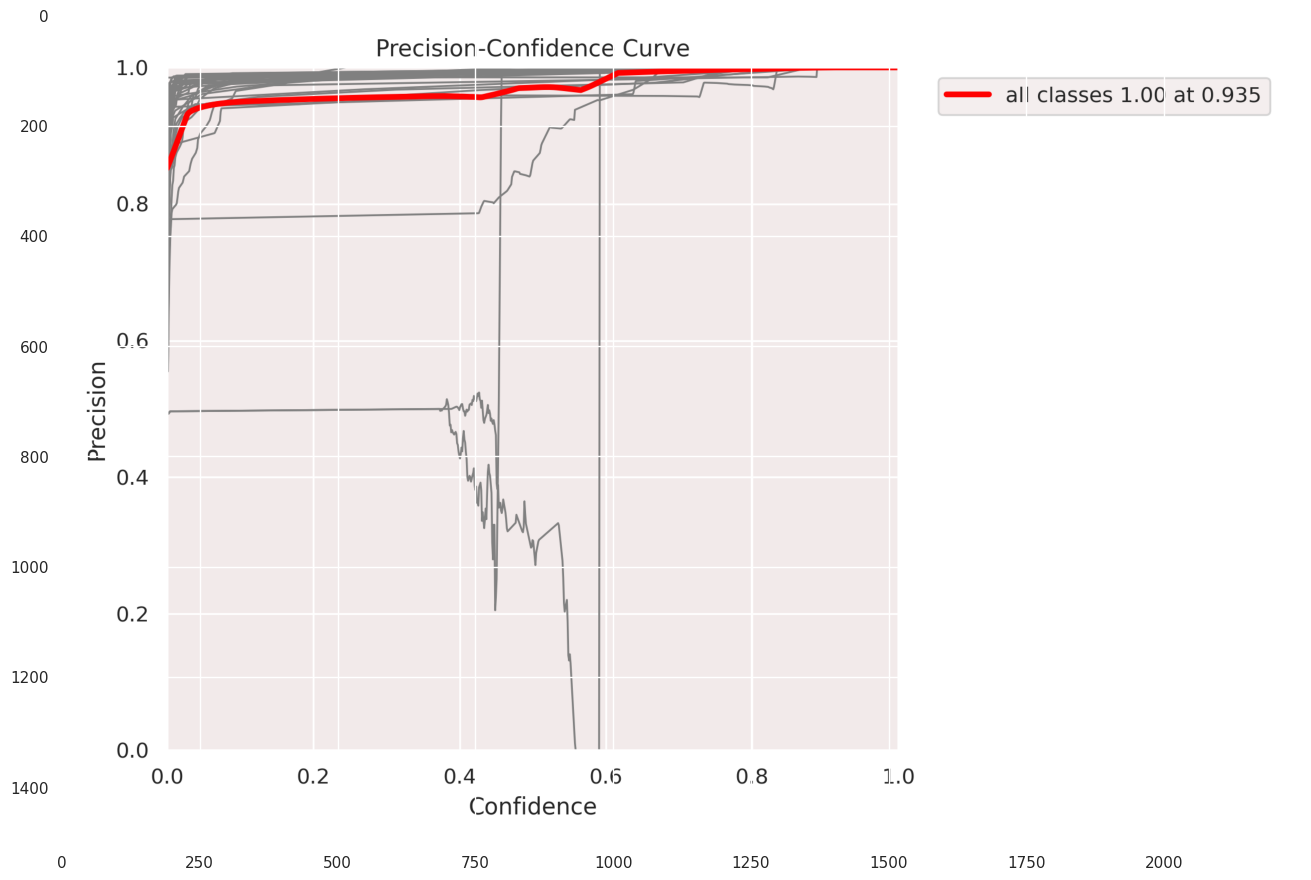

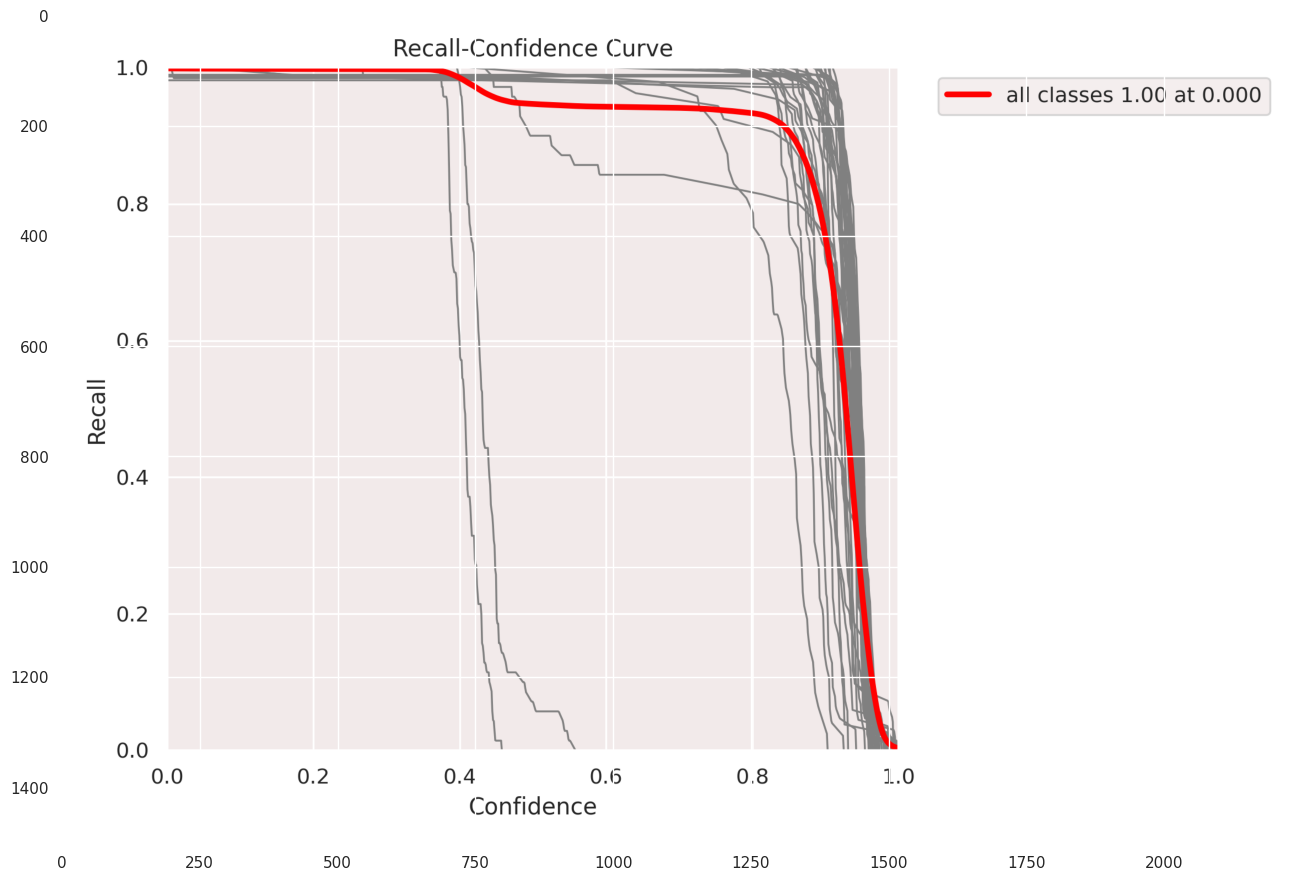

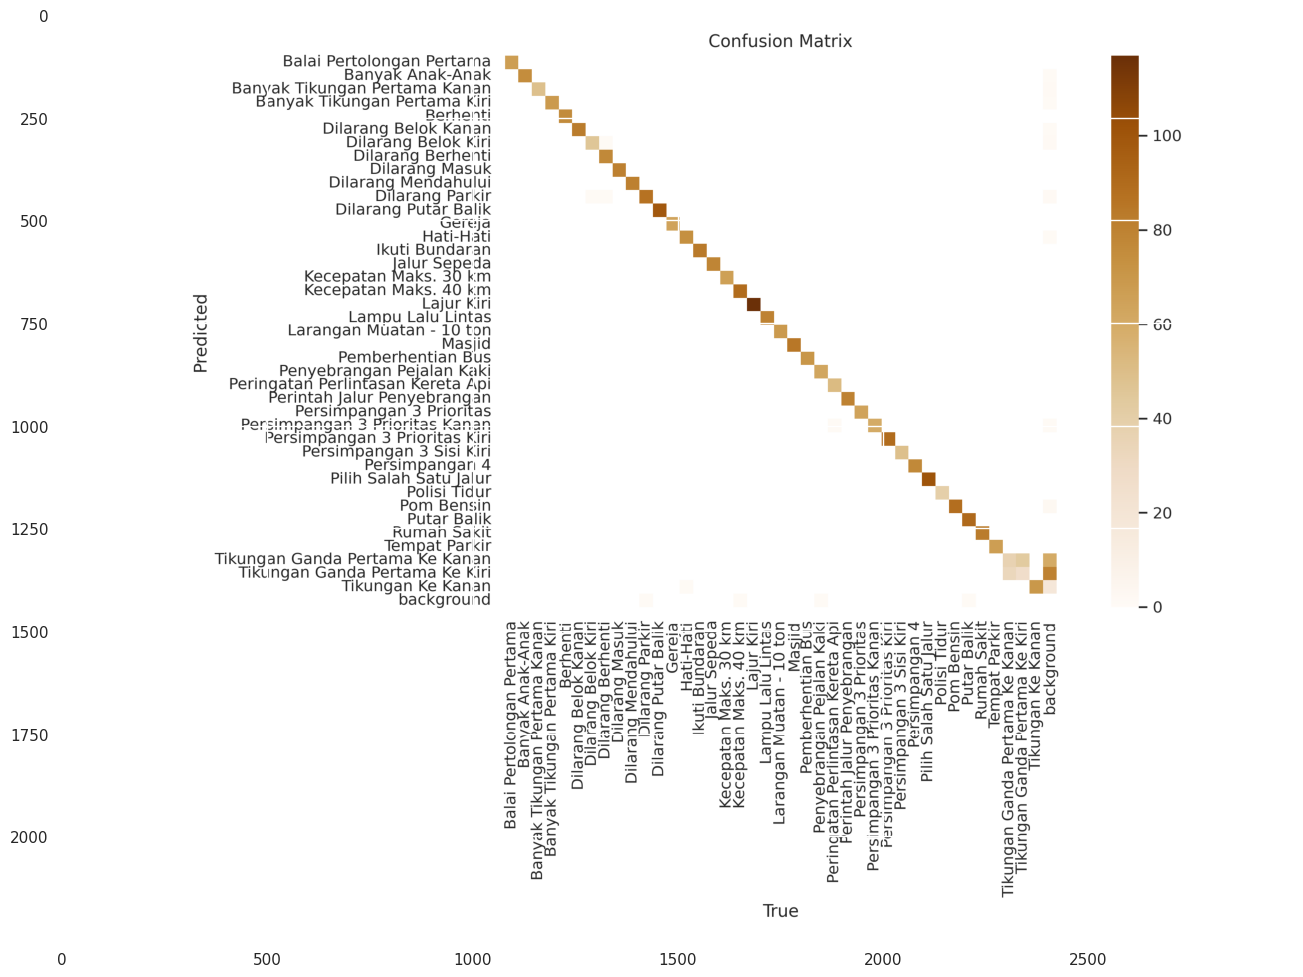

In [6]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

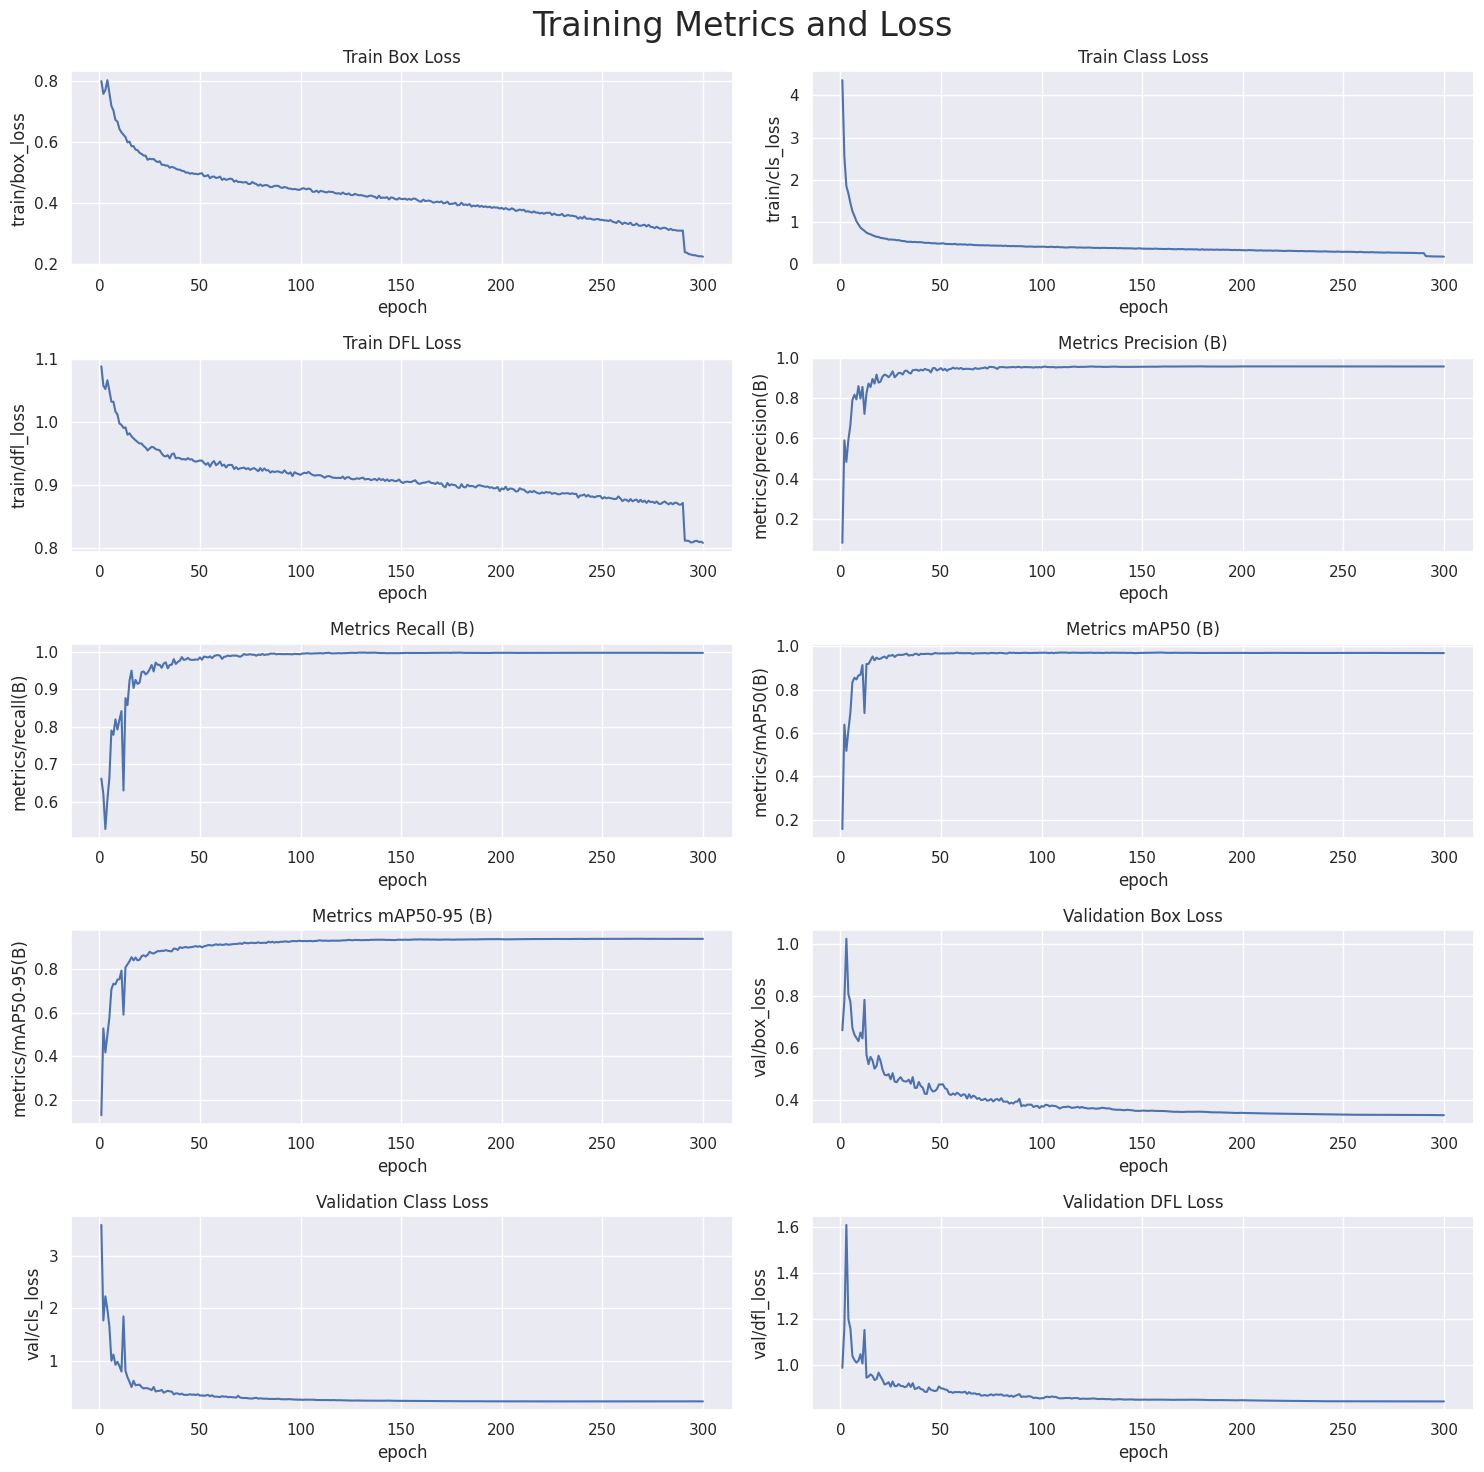

In [7]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [8]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


val: Scanning /kaggle/input/indonesia-traffic-sign-dataset-yolov11/test/labels... 1552 images, 91 backgrounds, 0 corrupt: 100%|██████████| 1552/1552 [00:09<00:00, 170.65it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/indonesia-traffic-sign-dataset-yolov11/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:09<00:00, 10.64it/s]


                   all       1552       1520      0.954      0.999       0.97      0.939
Balai Pertolongan Pertama         41         41      0.985          1      0.995      0.991
      Banyak Anak-Anak         36         36      0.983          1      0.995      0.994
Banyak Tikungan Pertama Kanan         24         24      0.943          1      0.993      0.972
Banyak Tikungan Pertama Kiri         35         35          1      0.997      0.995      0.961
              Berhenti         38         38      0.984          1      0.995      0.995
  Dilarang Belok Kanan         39         39      0.985          1      0.995      0.953
   Dilarang Belok Kiri         22         25      0.979          1      0.995      0.885
     Dilarang Berhenti         44         44      0.984          1      0.995      0.974
        Dilarang Masuk         41         41      0.986          1      0.995      0.979
   Dilarang Mendahului         27         27      0.977          1      0.995      0.993
     

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


In [9]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9540364508322098
metrics/recall(B):  0.9993558260972242
metrics/mAP50(B):  0.969727844160764
metrics/mAP50-95(B):  0.9388823777828617


In [10]:
# Path to the directory containing the images
image_dir = '/kaggle/input/indonesia-traffic-sign-dataset-yolov11/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 (no detections), 9.3ms
Speed: 2.8ms preprocess, 9.3ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 (no detections), 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Banyak Tikungan Pertama Kanan, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Tikungan Ke Kanan, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Hati-Hati, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Lajur Kiri, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs

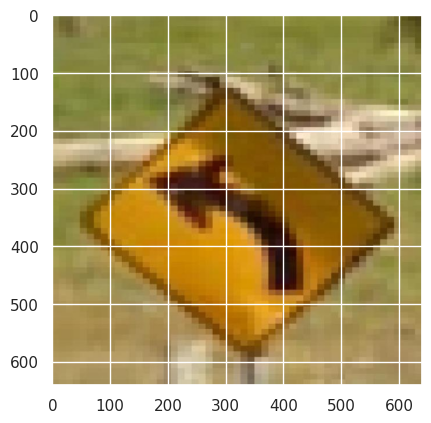

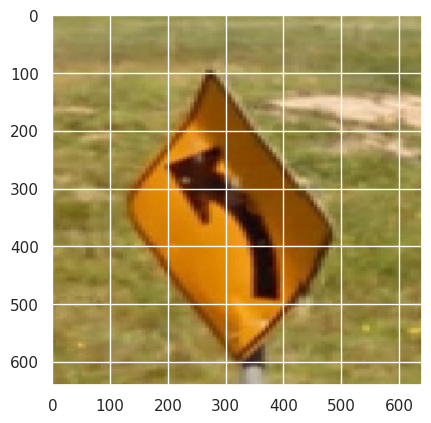

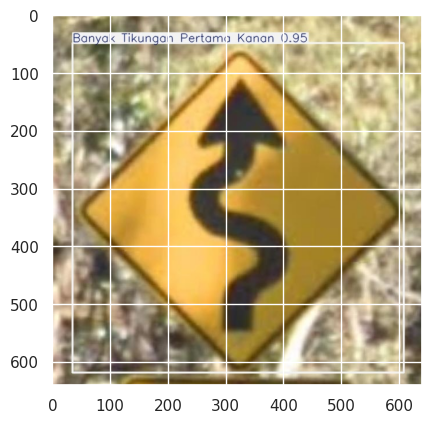

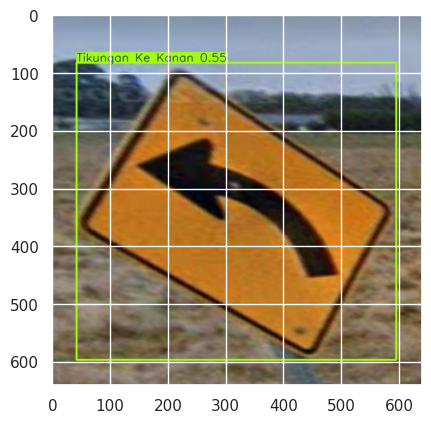

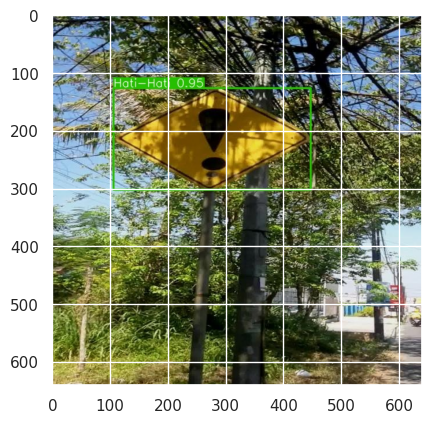

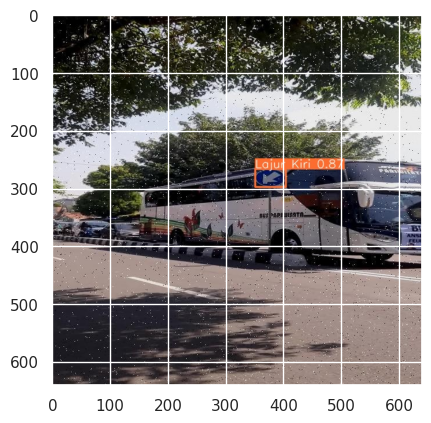

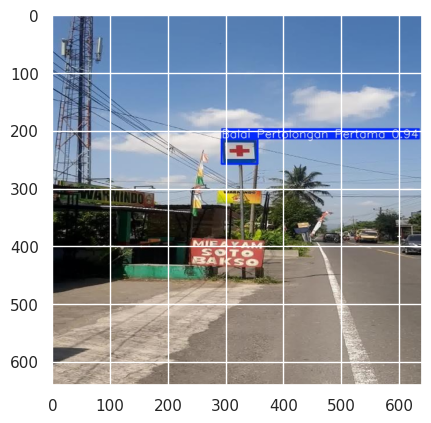

In [11]:
# View results
for i in range(2,9):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [12]:
import cv2
import time
#
#def limit_video_duration(input_path, output_path, duration_limit=30):
#    """Limits the duration of a video to a specified time.
#
#    Args:
#        input_path: Path to the input video file.
#        output_path: Path to save the limited video file.
#        duration_limit: Maximum duration of the video in seconds (default: 180 seconds).
#    """
#
#    cap = cv2.VideoCapture(input_path)
#    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#    fps = int(cap.get(cv2.CAP_PROP_FPS))
#
#    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
#
#    start_time = time.time()
#
#    while cap.isOpened() and (time.time() - start_time) < duration_limit:
#        ret, frame = cap.read()
#        if not ret:
#            break

#        out.write(frame)  # Write the frame directly without processing

#    cap.release()
#    out.release()

In [13]:
#input_video_path = '/content/jalanan_surabaya.mp4'
#output_video_path = '/content/limited_video.mp4'

#limit_video_duration(input_video_path, output_video_path)

In [14]:
from ultralytics import YOLO

def prediction_yolo_single_gpu(
    source: str='/kaggle/input/video-tester/VID_20250219_064115.mp4',
    weights: str='/kaggle/working/runs/detect/train/weights/best.pt',
    conf: float=0.25,
    save: bool=True,
    **kwargs
    ):

    model = YOLO(weights)

    prediction_results = model.predict(
        source=source,
        conf=conf,
        save=save,
        **kwargs
    )

    # Path of input video after prediction
    avi_path = '/kaggle/working/runs/detect/predict/result4.avi'

    # Path of the output video to be compressed
    mp4_path = "/kaggle/working/result_detection_yolov11.mp4"

    # Convert .avi to .mp4 using ffmpeg
    os.system(f"ffmpeg -i {avi_path} -vcodec libx264 {mp4_path}")

    return prediction_results

prediction_results = prediction_yolo_single_gpu()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/289) /kaggle/input/video-tester/VID_20250219_064115.mp4: 288x480 (no detections), 42.7ms
video 1/1 (frame 2/289) /kaggle/input/video-tester/VID_20250219_064115.mp4: 288x480 (no detections), 9.7ms
video 1/1 (frame 3/289) /kaggle/input/video-tester/VID_20250219_064115.mp4: 288x480 (no detections), 9.5ms
video 1/1 (frame 4/289) /kaggle/input/video-tester/VID_20250219_064115.mp4: 288x480 (no detections), 9.4ms
video 1/1 (frame 5/289) /ka

In [15]:
import os
from base64 import b64encode
from IPython.display import HTML, display

# Path of input video after prediction
save_path = '/kaggle/working/runs/detect/predict/result1.avi'

# Path of the output video to be compressed
compressed_path = "/kaggle/working/result_detection_yolov11.mp4"

# Kompres video menggunakan ffmpeg
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

if os.path.exists(compressed_path):
    # Read the compressed video
    with open(compressed_path, "rb") as video_file:
        video_data = video_file.read()

    # Encode video in base64 so it can be displayed in HTML
    data_url = "data:video/mp4;base64," + b64encode(video_data).decode()

    # Embed and display video on notebook
    display(HTML(f"""
    <video width="640" height="480" controls>
          <source src="{data_url}" type="video/mp4">
    </video>
    """))
else:
    print("Video file not found.")

Video file not found.
